# Heatmaps and Clustered Matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import webbrowser
webbrowser.open('https://github.com/mwaskom/seaborn-data/blob/master/flights.csv')

True

In [3]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.oracle_jre_usage',
 'Anaconda3',
 'AppData',
 'Application Data',
 'BullseyeCoverageError.txt',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'DS_Practice.ipynb',
 'Favorites',
 'InstallAnywhere',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{016888bd-6c6f-11de-8d1d-001e0bcde3ec}.TM.blf',
 'NTUSER.DAT{016888bd-6c6f-11de-8d1d-001e0bcde3ec}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{016888bd-6c6f-11de-8d1d-001e0bcde3ec}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'Oracle',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'siperian',
 'Start Menu',
 'Templates',
 'Video 10 - Data Handling in Python - Part 10.ipynb',
 'Video 11 - Data Handling in Python - Part 11.ipynb',
 'Vide

In [4]:
os.chdir("D:\Python\PyPractice")

In [5]:
os.getcwd()

'D:\\Python\\PyPractice'

In [7]:
os.listdir()

['Dummy_Data.csv',
 'Dummy_Data.xlsx',
 'Dummy_Data11.csv',
 'Dummy_Data12.txt',
 'Dummy_Data2.csv',
 'ex.xlsx',
 'flights.xlsx',
 'flights_new.csv',
 'new_dummy.csv',
 'new_dummy.xlsx',
 'SAC.png',
 'test.csv',
 'test1.csv',
 'test3.csv',
 'test4.csv',
 'tips.xlsx',
 'tips_new.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [33]:
flight_dframe = pd.read_csv("flights_new.csv")

In [34]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [12]:
flight_dframe.shape

(144, 3)

## you will normally need to pivot to get the heatmap

In [13]:
flight_dframe = flight_dframe.pivot("month","year","passengers")

In [14]:
flight_dframe # it gives for each year, each month we get, 12 yrs, 12 months,
# we are gonna pivot the data frame, that is what we use heat map for

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


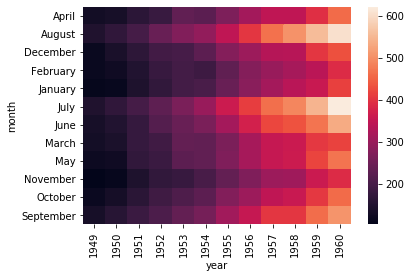

In [15]:
sns.heatmap(flight_dframe)

## across all years, july and August has more, nov it is low

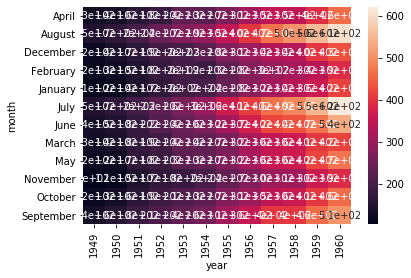

In [16]:
sns.heatmap(flight_dframe,annot=True) # annotate the cells with actual counts

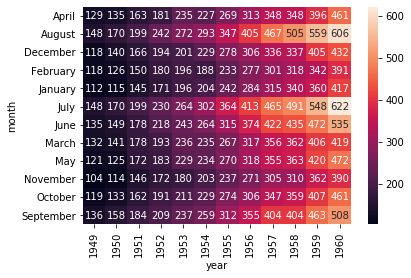

In [17]:
sns.heatmap(flight_dframe,annot=True,fmt='d') # annotate the cells with actual counts, formatted as integer

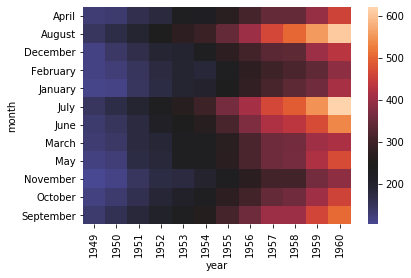

In [21]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955]) # a diverging color scheme starting from middle jan1955

## this is one way to control the color scheme

In [22]:
yearly_flights = flight_dframe.sum()
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [23]:
type(yearly_flights)

pandas.core.series.Series

In [24]:
# yearly flights
yearly_flights = flight_dframe.sum()

# since yearly_flights is a weird format, we will have to grab the values we want with a series, then put them in dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

# here a series with index starting from 0...to 11 forms, values will be the year

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

# here another series with index starting from 0...to 11 forms, values will be the sum of flights

# the below concat will help in combining via the index and generate the result set column wise

# make the dframe and name the columns, use concat function and concat using columns with same key/index values

year_dframe=pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


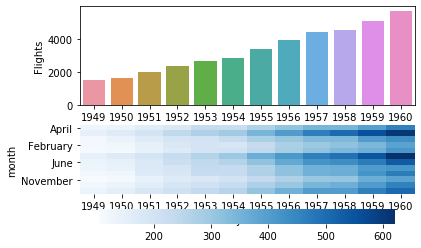

In [25]:
# heatmap can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1) # plt.subplot(2,1) means 2 rows and 1 column, f,(axis1,axis2) are tuple of labels
# here we are not using shared y axis as the y value cannot be shared

# create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# create the heatmap plot on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation":"horizontal"})

In [26]:
## Top : year wise no of flights
## bottom : the orientation is horizontal 

In [27]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


# Cluster maps - reformatted heat map such that similar rows/columns are adjacent

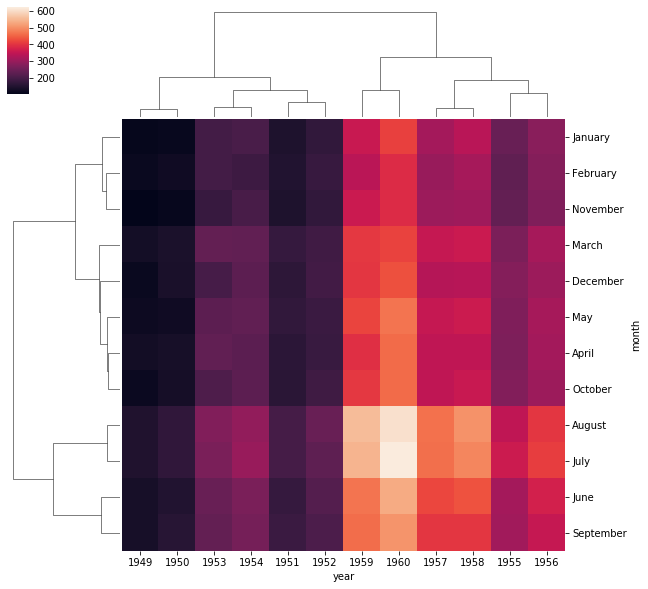

In [28]:
sns.clustermap(flight_dframe)
# basically similar kind of observations are placed at one area
# as you can see the years are no longer in proper order

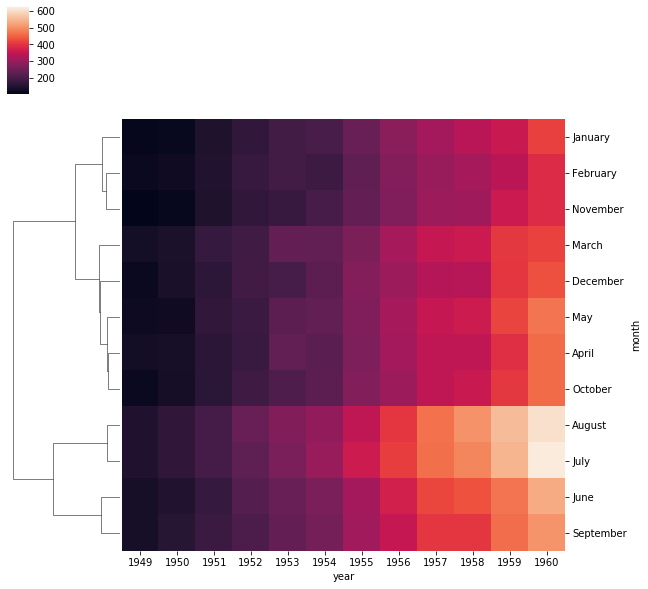

In [29]:
sns.clustermap(flight_dframe,col_cluster=False) # cluster by rows only
# that is clustering the months only. they seem to be same each other
## for eg: feb and nov, Aug and July , etc

## this is misleading slightly as the no of flights actually go up year by year
## so to really compare months across years, we should standardize data by year

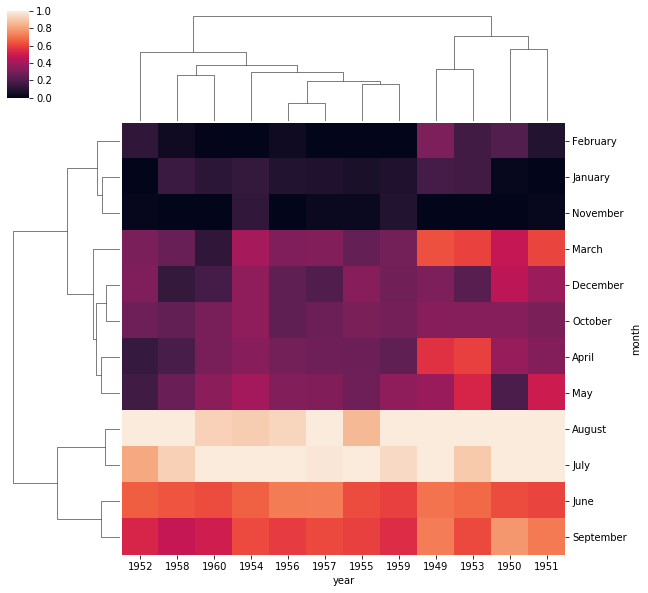

In [30]:
sns.clustermap(flight_dframe,standard_scale=1) # monthly values for each year standardize to go from o to 1
## remember 1 refers to column, 0 refers to rows, 

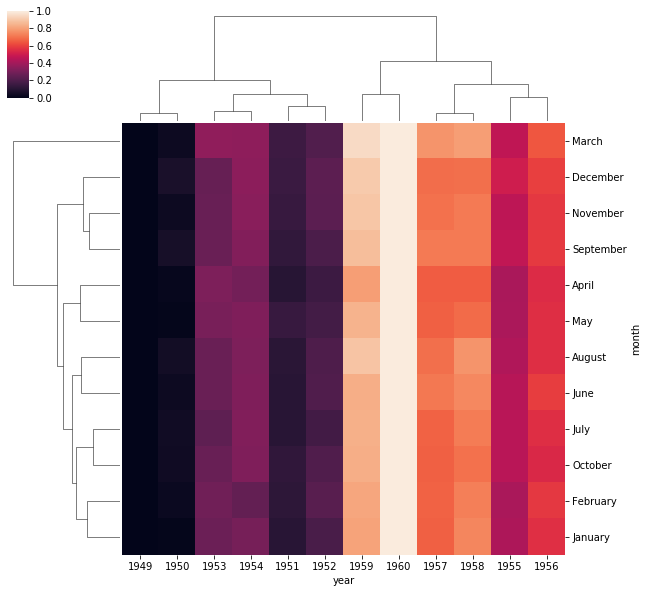

In [31]:
sns.clustermap(flight_dframe,standard_scale=0) # here standardize by month 

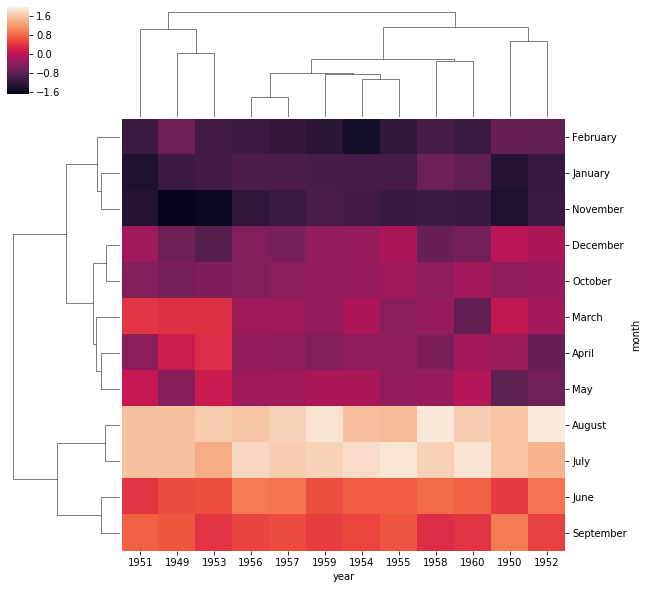

In [32]:
sns.clustermap(flight_dframe,z_score=1) # normalizing with z-score; alternative to standardising scale 0 - 1

In [35]:
flight_dframe.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(10) > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

NameError: name 'x' is not defined

In [9]:
x = ['A','B','C','D']
x

['A', 'B', 'C', 'D']

In [10]:
x.extend(['E','F','G'])
x

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
print("today is %d of %s" %(31,'DEC'))

today is 31 of DEC


In [12]:
d_2015={'x':10,'y':20}
d_2016={'x':100,'z':30}
d_2015.update(d_2016)


In [13]:
d_2015

{'x': 100, 'y': 20, 'z': 30}

In [14]:
z = 3+2.0

In [15]:
type(z)

float

In [19]:
s = 'HeLlO wOrLd'


In [20]:
s

'HeLlO wOrLd'

In [24]:
s.lower()

'hello world'

In [25]:
s.lower.startswith()

AttributeError: 'builtin_function_or_method' object has no attribute 'startswith'

In [26]:
g1=80

In [27]:
g2=90

In [28]:
a = (g1+g2)/2

In [29]:
a

85.0

In [30]:
t =(123,'a')

In [31]:
t

(123, 'a')

In [32]:
t*2

(123, 'a', 123, 'a')